In [1]:
import functools
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from   PIL import Image
import tensorflow as tf
from   tensorflow.keras import backend as K
from   tensorflow.keras import layers, losses, models, optimizers
from   tensorflow.keras.preprocessing import image as kp_image

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

In [2]:
!ls ../../../../images

elephant.jpg    parrot.png      sunset.jpg
face.png        skyscrapers.jpg zebra.jpg


In [3]:
IMG = '../../../../images'

In [9]:
content_path = f'{IMG}/elephant.jpg'
style_path = f'{IMG}/zebra.jpg'

### Image Preprocessing

In [10]:
def load_img(path):
    max_dim = 512
    img = Image.open(path)
    longest_side = max(img.size)
    scale = max_dim / longest_side
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)),
                     Image.ANTIALIAS)
    img = kp_image.img_to_array(img)
    # Broadcast img array so it has a batch dim on axis 0
    img = np.expand_dims(img, axis=0)
    return img

In [11]:
def show_img(img, title=None):
    # remove batch dim
    img = np.squeeze(img, axis=0)
    # Normalize for display
    img = img.astype('uint8')
    plt.imshow(img)
    if title is not None:
        plt.title(title)
        plt.imshow(img)

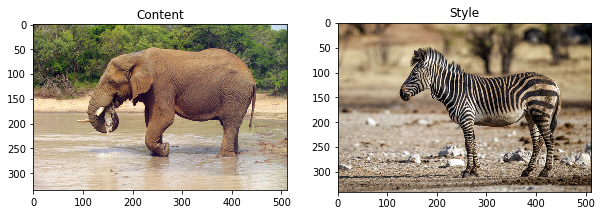

In [12]:
channel_means = [103.939, 116.779, 123.68]

plt.figure(figsize=(10, 10))
content_img = load_img(content_path).astype('uint8')
style_img = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
show_img(content_img, 'Content')
plt.subplot(1, 2, 2)
show_img(style_img, 'Style')

In [13]:
def load_and_process_img(path):
    img = load_img(path)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In [14]:
def deprocess_img(img):
    im = img.copy()
    if len(im.shape) == 4:
        im = np.squeeze(im, 0)
    assert len(im.shape == 3), (
        'Input to deprocess img should be [1, h, w, c] or [h, w, c]')
    im[:, :, 0] += channel_means[0]
    im[:, :, 1] += channel_means[1]
    im[:, :, 2] += channel_means[2]
    im = im[:, :, ::-1]
    im = np.clip(im, 0, 255).astype('uint8')
    return im